In [33]:
# Standard library imports
import os
import glob
import random
import numpy as np
import pandas as pd
import tensorflow as tf

# skimage
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
# Configuration files
seed = 42
np.random.seed = seed

TRAIN_PATH = "stage1_train"
TEST_PATH = "stage1_test"

# colecting ids of all images
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [5]:
# imput image dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

In [27]:
# Input Images Initialization
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [28]:
# Resizing images

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = os.path.join(TRAIN_PATH, id_)
    img = imread(os.path.join(TRAIN_PATH, id_, 'images', f'{id_}.png'))[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_files = os.listdir(os.path.join(path, 'masks'))
    for mask_file in mask_files:
        mask_ = imread(os.path.join(path, 'masks', mask_file))
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
        
    Y_train[n] = mask

100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [05:17<00:00,  2.11it/s]


In [29]:
# Input Images Initialization
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [31]:
# test images

for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = os.path.join(TEST_PATH, id_)
    img = imread(os.path.join(TEST_PATH, id_, 'images', f'{id_}.png'))[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 39.89it/s]


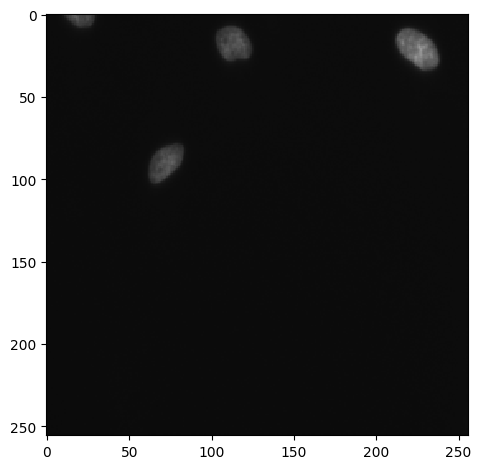

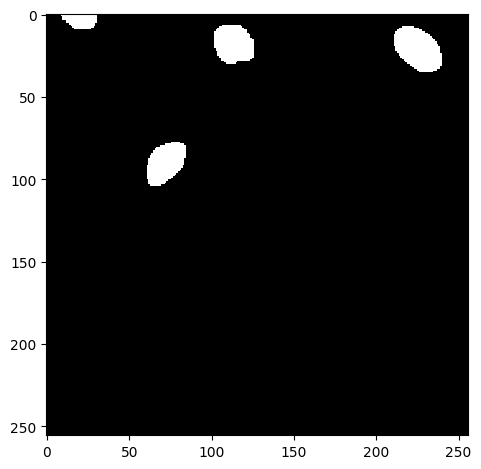

In [34]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [39]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [50]:
X_train

array([[[[  5,   5,   5],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [  4,   4,   4],
         [  3,   3,   3],
         [  3,   3,   3]],

        [[  6,   6,   6],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  3,   3,   3]],

        [[  6,   6,   6],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [  5,   5,   5],
         [  4,   4,   4],
         [  3,   3,   3]],

        ...,

        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  2,   2,   2],
         [  2,   2,   2],
         [  3,   3,   3]],

        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  2,   2,   2],
         [  2,   2,   2],
         [  2,   2,   2]],

        [[  3,   3,   3],
         [  2,   2,   2],
         [  3,   3,   3],
         ...,
         [  2,   2,   2],
        

In [51]:
np.savez('data.npz', x=X_train, y=Y_train)

# rest in kaggle file
# https://www.kaggle.com/manassharma6367/unet-keras/

In [52]:
np.savez('test_data.npz', x=X_test)